In [222]:
#Plot
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Data Packages
import math
import pandas as pd
import numpy as np

#Progress bar
from tqdm import tqdm

#Counter
from collections import Counter

#Operation
import operator

#Natural Language Processing Packages
import re
import nltk

## Download Resources
nltk.download("vader_lexicon")
nltk.download("stopwords")
nltk.download("averaged_perceptron_tagger")
nltk.download("wordnet")
nltk.download('punkt')

from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
from nltk import tokenize
from nltk.corpus import stopwords
from nltk.tag import PerceptronTagger
from nltk.data import find
from nltk.tokenize import word_tokenize
from nltk import pos_tag

## Machine Learning
import sklearn
import sklearn.metrics as metrics

## Data Visualization
import folium
from tabulate import tabulate
from scipy.stats.kde import gaussian_kde

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
<ipython-input-222-cf141d2e4c3c>:48: DeprecationWarning: Please use `gaussian_kde` from the `scipy.stats` namespace, the `scipy.stats.kde` namespace is deprecated.
  from scipy.stats.kde import gaussian_kde


In [223]:
# set pandas formatting options
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', 500)

In [224]:
#Read in from pandas
columnNames = ['filePath','hotelName','reviewColumn','ratingScore','groundTruth',
               'date_stamp','streetAddress', 'City',
               'Province','postalCode']

hotelDf = pd.read_csv('https://raw.githubusercontent.com/MIE223-2024/course-datasets/main/kingston-mx50.csv',
                          header=None,
                          names=columnNames)

hotelDf['numReviews'] = hotelDf.groupby('hotelName')['reviewColumn'].transform('count')

In [225]:
hotelDf.head()

,filePath,hotelName,reviewColumn,ratingScore,groundTruth,date_stamp,streetAddress,City,Province,postalCode,numReviews
0,data_kingston_50/ca/154992/9160041/885042479.html,Quality Inn &amp; Suites,"""Great room, great service, standard hotel breakfast. Decent coffee. However don't count on the internet, couldn't enter my virtual meetings even without video. Let alone stream a tv show or YouTube. Other then that it was a safe, clean and good choice.",3,negative,"April 6, 2023",1530 Robinson Crt,"('Kingston',)",Ontario,K7P 0K4,14
1,data_kingston_50/ca/154992/9160041/869263404.html,Quality Inn &amp; Suites,"""This hotel is exceptionally clean and well maintained. The staff is incredibly friendly and helpful. A big thank you to Emma for making our trip incredible! The room was very spacious with the most comfortable bed. I would highly recommend Quality Inn for a superb stay.",5,positive,"November 21, 2022",1530 Robinson Crt,"('Kingston',)",Ontario,K7P 0K4,14
2,data_kingston_50/ca/154992/9160041/857888766.html,Quality Inn &amp; Suites,"""We were travelling and needed a room for one night. The carpet was filthy. The bed was damp. As were the sheets and pillows. And the price ridiculous. 160 bucks for a night. Good place to stay away from.",1,negative,"September 1, 2022",1530 Robinson Crt,"('Kingston',)",Ontario,K7P 0K4,14
3,data_kingston_50/ca/154992/9160041/886311292.html,Quality Inn &amp; Suites,"""No nonsense hotel to stay at on the way to Ottawa. Room is renovated, shower is nice, breakfast is good. Staff is friendly. It's all you want for this type of hotel. I would stay here again if I needed a hotel for the same type of thing.",5,positive,"April 15, 2023",1530 Robinson Crt,"('Kingston',)",Ontario,K7P 0K4,14
4,data_kingston_50/ca/154992/9160041/901743337.html,Quality Inn &amp; Suites,"""Stayed on the main floor and it was extremely noisy, lots of hall noise, but worst was the parking construction going on right outside our window. Dump Trucks (paving?) kept backing up with their backup beeper, honking their very loud horns, etc. So much for afternoon nap before our event.\nWish we had been warned of the construction, (especially since i asked for a quiet room) \nThe room was clean, with plenty of towels, toiletries and coffee. \nThe beds were comically soft, to the point ...",3,negative,"July 9, 2023",1530 Robinson Crt,"('Kingston',)",Ontario,K7P 0K4,14


# Q1

In [226]:
def get_histogram(df: pd.DataFrame, figsize=(10,5)) -> None:
    ## Your code starts here ##
    plt.figure(figsize=figsize)
    plt.hist(df['ratingScore'])
    plt.title('Distribution of Hotel Ratings')
    plt.xlabel('Rating')
    plt.ylabel('Frequency')
    plt.show()



    ## end ##

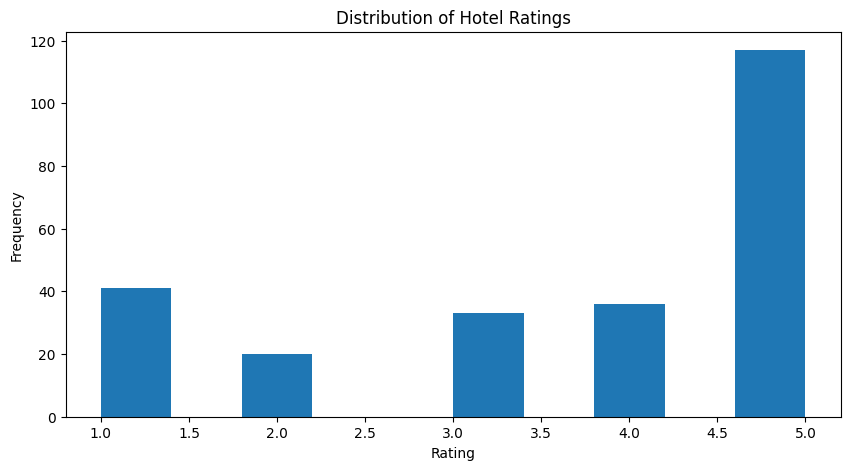

In [227]:
# DO NOT MODIFY THIS CODE
get_histogram(hotelDf)

# Q2

In [228]:
def plot_time_series(df: pd.DataFrame) -> None:
    ## Your code starts here ##
    # It can be useful to see when reviews were being made and how the ratings changed using a running mean
    fig, ax = plt.subplots(2, 1, figsize=(15,7), sharex=True, gridspec_kw={'height_ratios': [1, 2]})

    for hotel in df['hotelName'].unique():  # Iterate over unique hotel names
        _df = df[df['hotelName']==hotel].set_index('date_stamp')
        _df.index = pd.to_datetime(_df.index)
        _df = _df.sort_index()
        _df['count'] = 1
        _df['count'].cumsum().plot(ax=ax[0], label=hotel, marker='o')
        _df['ratingScore'].rolling(5).mean().plot(ax=ax[1], label=hotel)

    ax[1].set_ylabel('Avg Rating')
    ax[0].set_ylabel('Number of Reviews')
    ax[0].legend()
    ax[1].legend()

    plt.tight_layout()
    plt.show()









  ## end ##

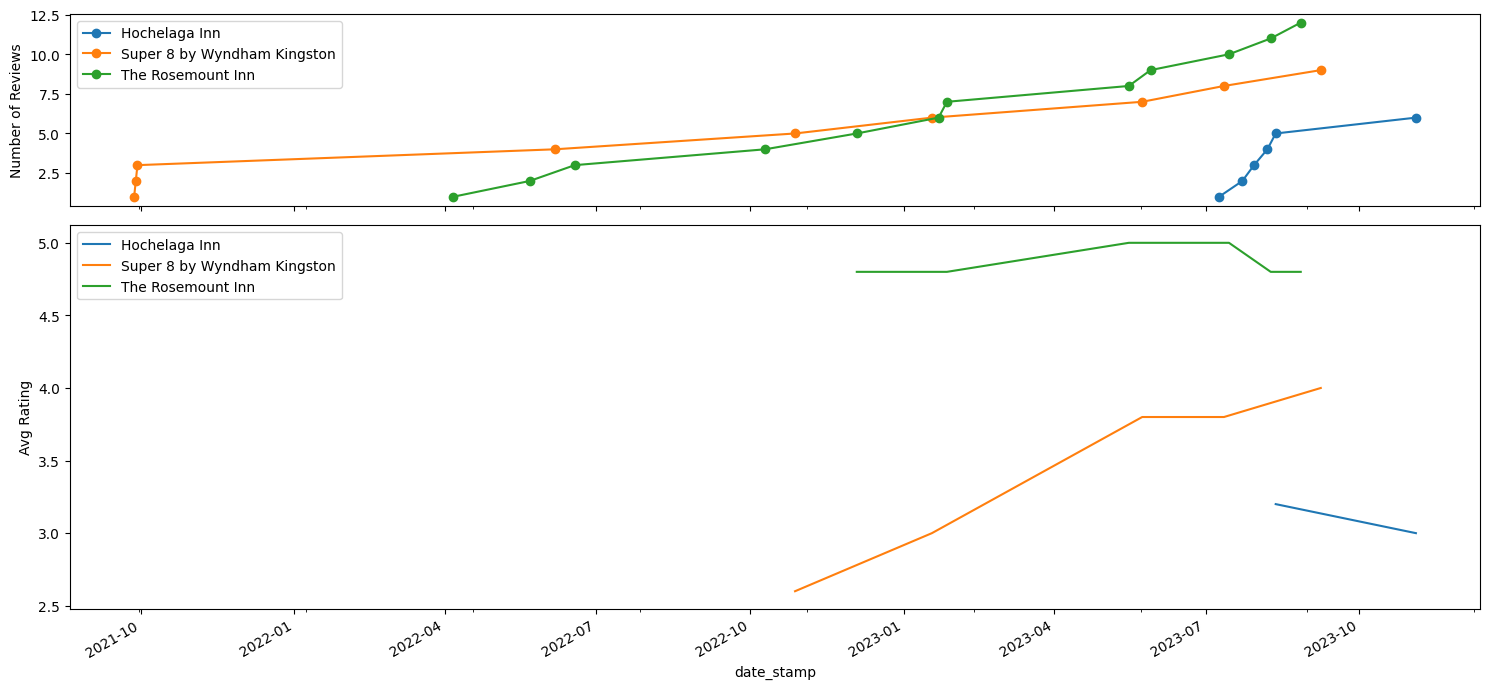

In [229]:
# DO NOT MODIFY THIS CODE
hotelNames = ['Hochelaga Inn', 'Super 8 by Wyndham Kingston', 'The Rosemount Inn']
plot_time_series(hotelDf[hotelDf['hotelName'].isin(hotelNames)])

# Q3

## (a)

In [230]:
# DO NOT MODIFY THIS CODE
def get_stop_words():
  stop = set(stopwords.words('english'))
  stop.add('hotel')
  stop.add('room')
  stop.add('rooms')
  stop.add('stay')
  stop.add('staff')
  return stop

def most_frequent_words(df: pd.DataFrame, kwords: int) -> list[tuple[str, int]]:
  ## Your code starts here ##
  stop = get_stop_words()
  counter = Counter()

  reviews = df['reviewColumn'].values

  # Go through each review and feed words into counter
  for review in reviews:
    tokens = word_tokenize(review)
    counter.update([word.lower() for word in tokens if word.lower() not in stop and len(word) >= 3])

  # Get top k most common
  topk = counter.most_common(kwords)

  ## end ##
  return topk


In [231]:
# DO NOT MODIFY THIS CODE
topk = most_frequent_words(hotelDf, 500)
topk[:10]


[('clean', 112),
 ('breakfast', 96),
 ('kingston', 87),
 ('great', 80),
 ('one', 80),
 ('good', 79),
 ('friendly', 77),
 ('place', 75),
 ('nice', 75),
 ('would', 74)]

## (b)

In [232]:
## Your code starts here ##
# QUESTION 3b:
# Calculate MI score of top 500 most common words across all lowercase tokens in data set
# Print DataFrame showing the 5 words with highest MI scores (include the MI score)



def evalSentences(sentences, to_df=False, columns=[]):
    # Instantiate an instance to access SentimentIntensityAnalyzer class
    # from vader in nltk
    sid = SentimentIntensityAnalyzer()
    pdlist = []
    if to_df:
        for sentence in tqdm(sentences):
            ss = sid.polarity_scores(sentence)
            pdlist.append([sentence]+[ss['compound']])
        reviewDf = pd.DataFrame(pdlist)
        #reviewDf.columns = columns
        return reviewDf

    else:
        for sentence in tqdm(sentences):
            print("\n" + sentence)
            ss = sid.polarity_scores(sentence)
            for k in sorted(ss):
                print('{0}: {1}, '.format(k, ss[k]), end='')
            print()

reviews = hotelDf['reviewColumn'].values
reviewDF = evalSentences(reviews, to_df=True, columns=['reviewColumn'])
reviewDF = pd.concat([reviewDF, hotelDf[['ratingScore']]], axis=1)
reviewDF = reviewDF.rename(columns={0: 'reviewColumn'})



# Function to calculate Mutual Information (MI) score
def getMI(topk, df, label_column='groundTruth'):
    miScore = []
    for word, _ in topk:
        miScore.append([word, metrics.mutual_info_score(df[label_column], df[word])])
    miScoredf = pd.DataFrame(miScore, columns=['Word', 'MI Score']).sort_values('MI Score', ascending=False)
    return miScoredf

# Define your hotelDf DataFrame and reviewDF DataFrame here
# Assuming reviewDF contains a column named 'reviewColumn' containing review text



def dataFrameTransformation(hotelDf, reviewDF, topk):
    reviews = hotelDf['reviewColumn'].values

    # Find out if a particular review has the word from topk list
    freqReview = []
    for i in range(len(reviews)):
        tempCounter = Counter([word.lower() for word in word_tokenize(reviews[i])])
        topkinReview = [1 if tempCounter[word] > 0 else 0 for (word, wordCount) in topk]
        freqReview.append(topkinReview)

    # Prepare freqReviewDf
    freqReviewDf = pd.DataFrame(freqReview, columns=[word for word, _ in topk])
    finaldf = hotelDf[['hotelName', 'groundTruth']].join(freqReviewDf)
    return finaldf

finaldf = dataFrameTransformation(hotelDf, reviewDF, topk)
miScoredf = getMI(topk, finaldf)
miScoredf.head()
## end ##

100%|██████████| 247/247 [00:00<00:00, 803.95it/s]


,Word,MI Score
3,great,0.070770
99,dirty,0.066292
11,n't,0.051020
0,clean,0.047330
42,floor,0.041603


## (c)

In [233]:
def calc_pmi(df: pd.DataFrame, word: str) -> pd.DataFrame:
  ## Your code starts here ##

  pmilist=[]
  N = df.shape[0]
  for sentiment in ['positive','negative']:
    for word_present in [False,True]:
      px = sum(df['groundTruth']==sentiment)
      py = sum(df[word]==word_present)
      pxy = len(df[(df['groundTruth']==sentiment) & (df[word]==word_present)])

      if pxy==0:#Log 0 cannot happen
        pmi = math.log((pxy+0.0001)*N/(px*py))
      else:
        pmi = math.log(pxy*N/(px*py))

      pmilist.append([sentiment]+[word_present]+[px]+[py]+[pxy]+[pmi])

    # assemble the results into a dataframe
  pmidf = pd.DataFrame(pmilist)
  pmidf.columns = ['sentiment (x)','word_present (y)','px','py','pxy','pmi']

  ## end ##
  return pmidf

In [234]:
# calc_pmi for "great"
calc_pmi(finaldf,'great')

,sentiment (x),word_present (y),px,py,pxy,pmi
0,positive,False,153,187,98,-0.167191
1,positive,True,153,60,55,0.391939
2,negative,False,94,187,89,0.223621
3,negative,True,94,60,5,-1.518813


In [235]:
# calc_pmi for "dirty"
calc_pmi(finaldf,'dirty')

,sentiment (x),word_present (y),px,py,pxy,pmi
0,positive,False,153,231,153,0.066971
1,positive,True,153,16,0,-11.503979
2,negative,False,94,231,78,-0.119615
3,negative,True,94,16,16,0.966094


## (d)

In [236]:
# DO NOT MODIFY ANY CODE IN THIS CELL

# to make the results more useable, we clean up the tree results shown above.
lemmatizer = nltk.WordNetLemmatizer()
stemmer = nltk.stem.porter.PorterStemmer()
stopword_list = get_stop_words()

# generator, create item one a time
def get_terms(tree):
    for leaf in leaves(tree):

        term = [normalise(w) for w,t in leaf if acceptable_word(w) ]
        # Phrase only
        if len(term)>1:
            yield term

# generator, generate leaves one by one
def leaves(tree):
    """Finds NP (nounphrase) leaf nodes of a chunk tree."""
    for subtree in tree.subtrees(filter = lambda t: t.label()=='NP' or t.label()=='JJ' or t.label()=='RB'):
        yield subtree.leaves()

# stemming, lematizing, lower case...
def normalise(word,lemmatizer=lemmatizer, stemmer=stemmer):
    """Normalises words to lowercase and stems and lemmatizes it."""
    word = word.lower()
    word = stemmer.stem(word)
    word = lemmatizer.lemmatize(word)
    return word

# stop-words and length control
def acceptable_word(word, stopword_list=stopword_list):
    """Checks conditions for acceptable word: length, stopword."""
    accepted = bool(2 <= len(word) <= 40
        and word.lower() not in stopword_list)
    return accepted

# Flatten phrase lists to get tokens for analysis
def flatten_phrase_lists(npTokenList):
    finalList =[]
    for phrase in npTokenList:
        token = ''
        for word in phrase:
            token += word + ' '
        finalList.append(token.rstrip())
    return finalList

In [237]:
## Your code goes here ##

grammar = r"""
    NBAR:
        {<NN.*|JJ>*<NN.*>}  # Nouns and Adjectives, terminated with Nouns

    NP:
        {<NBAR>}
        {<NBAR><IN><NBAR>}  # Above, connected with in/of/etc...
"""


# DO NOT MODIFY THIS CODE
chunker = nltk.RegexpParser(grammar)

In [238]:
def getTopKNP(df: pd.DataFrame, kNPs: int) -> list[tuple[str, int]]:
  ## Your code starts here ##

  counter = Counter()
  reviews = df['reviewColumn'].values

  for review in reviews:
            counter.update(flatten_phrase_lists([word for word in get_terms(chunker.parse(pos_tag(word_tokenize(review))))]))
  topk = counter.most_common(kNPs)


  ## end ##
  return topk

In [239]:
# Print top 10 most common noun phrases
topk_phrase = getTopKNP(hotelDf, 50)
topk_phrase[:10]

[('front desk', 32),
 ('next time', 10),
 ('great locat', 9),
 ('coffe maker', 9),
 ('comfort bed', 8),
 ('air condition', 8),
 ('park lot', 6),
 ('mini fridg', 6),
 ('green acr inn', 6),
 ('great experi', 5)]

## (e)

In [240]:
## Your code starts here ##

# using only hotels with at least 15 reviews, find average rating for each hotels
# print hotel and average rating of hotel with the highest average rating and lowest average rating
# using only the reviews for each hotel (ignore reviews of all other hotels),
# determine the 5 noun phrases with the highest PMI for positive and negative sentiments
# do this for both the highest rated and lowest rated hotels
# you should print 4 DataFrames with 5 rows each and 2 columns (the noun phrase and PMI),
# plus a header row (PMI for positive and negative sentiment for each of the 2 hotels).

def avg_rating_per_hotel(df):
  # average the scores over all hotels
  tempDf = hotelDf[['hotelName','ratingScore','reviewColumn']]
  tempDf.columns = ['hotelName', 'AverageRatingScore','n_reviews']
  tempDf = tempDf.groupby('hotelName').agg({'AverageRatingScore':'mean','n_reviews':'count'})
  filtered_df = tempDf[tempDf['n_reviews'] >= 15]
  return filtered_df




def pmiCalc(df, word, gt_sentiment, label_column='groundTruth'):

    N = df.shape[0]

    px = sum(df[label_column]==gt_sentiment)
    py = sum(df[word]==True)
    pxy = len(df[(df[label_column]==gt_sentiment) & (df[word]==True)])

    if pxy==0 and (px != 0 and py != 0):#Log 0 cannot happen
        pmi = math.log((pxy+0.0001)*N/(px*py))
    elif px == 0 or py == 0 or pxy == 0:
        pmi = math.log(0.0001)
    else:
        pmi = math.log(pxy*N/(px*py))
    return pmi


def pmiForAllCal(df, topk_word, gt_sentiment, label_column='groundTruth'):
  #Try calculate all the pmi for top k and store them into one pmidf dataframe

  index = [x[0] for x in topk_word]
  pmiDf = pd.DataFrame(index=index, columns=['pmi'])

  for (word, count) in tqdm(topk_word):
    pmiDf.at[word, 'pmi'] = pmiCalc(df,word,gt_sentiment,label_column)

  return pmiDf


def getTopKNP(df, kNPs):

    counter = Counter()
    reviews = df['reviewColumn'].values

    for review in reviews:
            counter.update(flatten_phrase_lists([word
                            for word
                            in get_terms(chunker.parse(pos_tag(word_tokenize(review))))
                            ]))
    topk = counter.most_common(kNPs)
    return topk


def NPdataFrameTransformation(hotelDf, reviewDF, topk):
    #reviews = reviewDF['reviewColumn'].values

    #Find out if a particular review has the word from topk list
    freqReview = []
    for i in range(len(reviews)):
        tempCounter = Counter(flatten_phrase_lists([word
                                       for word
                                       in get_terms(chunker.parse(pos_tag(word_tokenize(reviews[i]))))]))
        topkinReview = [1 if tempCounter[word] > 0 else 0 for (word,wordCount) in topk]
        freqReview.append(topkinReview)


    #Prepare freqReviewDf
    freqReviewDf = pd.DataFrame(freqReview)
    dfName = []
    for c in topk:
        dfName.append(c[0])
    freqReviewDf.columns = dfName
    finalreviewDf = reviewDF.join(freqReviewDf)
    finaldf = hotelDf[['hotelName','groundTruth']].join(finalreviewDf)
    return finaldf

finaldf = NPdataFrameTransformation(hotelDf, reviewDF, topk)
avg_rating_df = avg_rating_per_hotel(finaldf)
avg_rating_df = avg_rating_df.sort_values(by='AverageRatingScore', ascending=False)

best_hotel = avg_rating_df.index[0]
best_hotel_reviews_df = finaldf[finaldf['hotelName'] == best_hotel]
avg_rating_df.head()


,AverageRatingScore,n_reviews
hotelName,,
Residence Inn by Marriott Kingston Water&#39;s Edge,4.782609,23
Green Acres Inn,4.500000,16
Delta Hotels by Marriott Kingston Waterfront,3.647059,17
Kingston Crest Residences,3.166667,30
Bayside Inn &amp; Waterfront Suites,2.656250,32


In [241]:
# Top Hotel Positive PMI

topk_phrase = getTopKNP(best_hotel_reviews_df, 50)
finaldf_phrase = NPdataFrameTransformation(finaldf, reviewDF, topk_phrase)
pmiposdf_phrase_top = pmiForAllCal(finaldf_phrase,topk_phrase,'positive')
pmiposdf_phrase_top.sort_values(by='pmi', ascending = False).head(5)





100%|██████████| 50/50 [00:00<00:00, 950.63it/s]


,pmi
resid inn,0.47895
breakfast bar,0.47895
medic reason,0.47895
first week,0.47895
first experi,0.47895


In [242]:
# Top Hotel Negative PMI
pmiposdf_phrase_top = pmiForAllCal(finaldf_phrase,topk_phrase,'negative')
pmiposdf_phrase_top.sort_values(by='pmi', ascending = False).head(5)


100%|██████████| 50/50 [00:00<00:00, 811.91it/s]


,pmi
\n\nmi wife,0.966094
share loung,0.966094
frank exchang,0.966094
forgiv soul,0.966094
next morn,0.966094


In [243]:
# Bottom Hotel Positive PMI
avg_rating_df_1 = avg_rating_per_hotel(finaldf)
avg_rating_df_1 = avg_rating_df_1.sort_values(by='AverageRatingScore', ascending=True)

worst_hotel = avg_rating_df_1.index[0]
worst_hotel_reviews_df = finaldf[finaldf['hotelName'] == worst_hotel]

topk_phrase_bot = getTopKNP(worst_hotel_reviews_df, 50)
finaldf_phrase_bot = NPdataFrameTransformation(finaldf, reviewDF, topk_phrase_bot)
pmiposdf_phrase_bottom = pmiForAllCal(finaldf_phrase_bot,topk_phrase_bot,'positive')
pmiposdf_phrase_bottom.sort_values(by='pmi', ascending = False).head(5)


100%|██████████| 50/50 [00:00<00:00, 874.12it/s]


,pmi
famili holiday,0.47895
baysid motel,0.47895
great place,0.47895
new favorit place,0.47895
great view,0.47895


In [244]:
# Bottom Hotel Negative PMI
pmiposdf_phrase_bottom = pmiForAllCal(finaldf_phrase_bot,topk_phrase_bot,'negative')
pmiposdf_phrase_bottom.sort_values(by='pmi', ascending = False).head(5)

100%|██████████| 50/50 [00:00<00:00, 940.74it/s]


,pmi
spider web,0.966094
carpet floor,0.966094
star rate,0.966094
taxi home,0.966094
decent size,0.966094


# Q4

## (a)

In [245]:
grammar = r"""
    NP: {<DT>?<JJ|JJS|JJR>*<NN|NNS>+}

"""


#grammar = r"""
 #   NP: {<DT>?<JJ.*>*<NN.*>+}
#"""

chunker = nltk.RegexpParser(grammar)

## (b)

In [246]:
## Your code starts here ##



topk_phrase_1 = getTopKNP(finaldf, 50)
finaldf_phrase_1 = NPdataFrameTransformation(hotelDf, reviewDF, topk_phrase_1)




## end ##

In [247]:
# Positive PMI
#Sorted top pmi words for positive reviews

#pmiposdf_phrase_P= pmiForAllCal(finaldf_phrase_1,topk_phrase_1,'positive')
#pmiposdf_phrase_P.sort_values(by='pmi', ascending = False).head(5)

pmiposdf_phrase = pmiForAllCal(finaldf_phrase_1,topk_phrase_1,'positive')
pmiposdf_phrase.sort_values('pmi',ascending=0).head(5)

100%|██████████| 50/50 [00:00<00:00, 617.00it/s]


,pmi
reason price,0.47895
super clean,0.47895
water slide,0.47895
great experi,0.47895
great place,0.47895


In [248]:
# Negative PMI
#Sorted top pmi words for negative reviews


pminegdf_neg = pmiForAllCal(finaldf_phrase_1,topk_phrase_1,'negative')
pminegdf_neg.sort_values('pmi',ascending=0).head(5)

#pmiposdf_phrase_N= pmiForAllCal(finaldf_phrase_1,topk_phrase_1,'negative')
#pmiposdf_phrase_N.sort_values(by='pmi', ascending = False).head(5)

100%|██████████| 50/50 [00:00<00:00, 605.47it/s]


,pmi
good size,0.966094
bathroom door,0.966094
good choic,0.966094
air condition,0.966094
reward number,0.966094


## (c)

Answer:
The PMI analysis highlights common complaints or dislikes about the hotels by displaying common phrases associated with negative sentiment. For example, phrases like: "poor service", "dirty rooms", and "rude staff" with high PMI values indicate that these phrases were repeatably written in reviews by guests. This information is helpful to the hotel as they can address which aspects of their service relate to the high PMI values to ultimatley improve customer satisfaction.

